In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance

np.random.seed(1)
pd.set_option("display.max_colwidth", None)

In [ ]:
from google.colab import drive

drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
paths = glob.glob("/gdrive/MyDrive/color/Grape*/*.JPG", recursive=True)
len(paths)

4062

In [ ]:
paths = random.sample(paths, 20)
paths

['/gdrive/MyDrive/color/Grape___Esca_(Black_Measles)/75dc7357-a936-4f3b-b099-eaec6ad03527___FAM_B.Msls 1761.JPG',
 '/gdrive/MyDrive/color/Grape___Esca_(Black_Measles)/46d513d3-a4ff-4ec6-b123-867c3dc15f48___FAM_B.Msls 1174.JPG',
 '/gdrive/MyDrive/color/Grape___Black_rot/720c33de-fbcc-4170-8a06-c81ab8c030ec___FAM_B.Rot 3172.JPG',
 '/gdrive/MyDrive/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/85b5b58b-ce03-4a10-844e-08e3b2c14d61___FAM_L.Blight 4573.JPG',
 '/gdrive/MyDrive/color/Grape___Black_rot/81c59976-e6ce-46e6-b5b7-30a3ea1e3503___FAM_B.Rot 0610.JPG',
 '/gdrive/MyDrive/color/Grape___Esca_(Black_Measles)/dd0daa1c-d6cb-418c-87cb-0a810aca5b65___FAM_B.Msls 3797.JPG',
 '/gdrive/MyDrive/color/Grape___Esca_(Black_Measles)/d55a2dd9-d6c3-4a49-8cb7-9fbbc9c51089___FAM_B.Msls 1309.JPG',
 '/gdrive/MyDrive/color/Grape___Esca_(Black_Measles)/da3943d3-ecea-4e99-bcde-9c1dbc05764e___FAM_B.Msls 4478.JPG',
 '/gdrive/MyDrive/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/6f672efb-7502-4585-8544-facc7

In [ ]:
orig = np.array([np.asarray(Image.open(img)) for img in paths])
orig.shape

(20, 256, 256, 3)

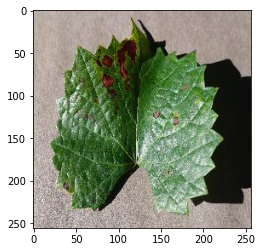

In [ ]:
plt.imshow(orig[0])

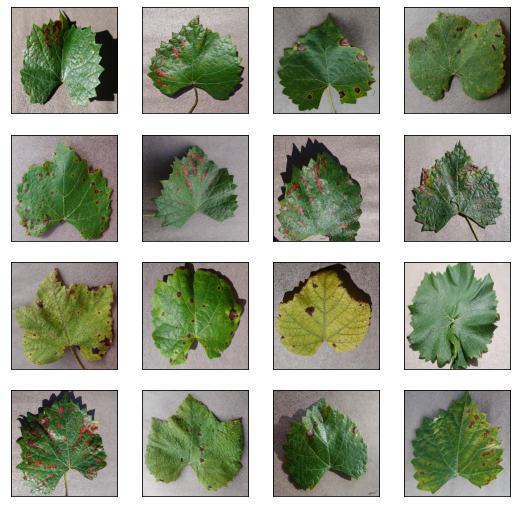

In [ ]:
plt.figure(figsize=(9, 9))
i = 0
for img in orig[0:16]:
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
contrast = [
    np.asarray(
        ImageEnhance.Contrast(Image.fromarray(img, "RGB")).enhance(
            np.random.choice(np.linspace(0.5, 1.5, 5))
        )
    )
    for img in orig
]

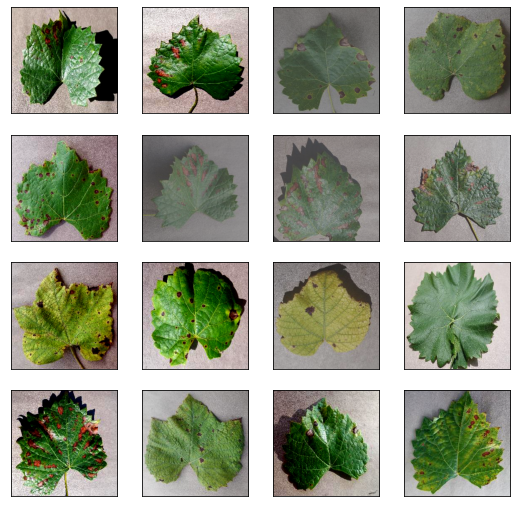

In [ ]:
plt.figure(figsize=(9, 9))
i = 0
for img in contrast[0:16]:
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
brightness = [
    np.asarray(
        ImageEnhance.Contrast(Image.fromarray(img, "RGB")).enhance(
            np.random.choice(np.linspace(0.5, 1.5, 5))
        )
    )
    for img in contrast
]

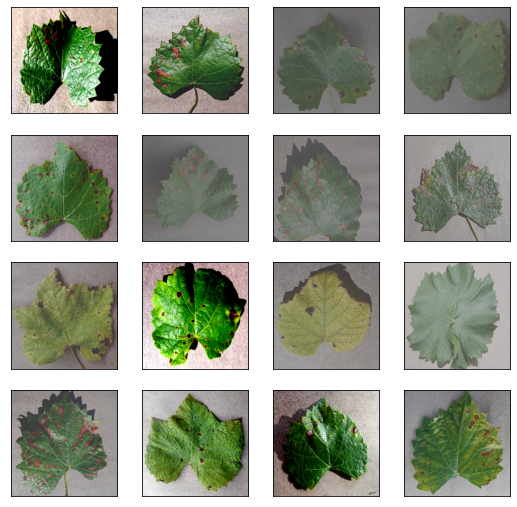

In [ ]:
plt.figure(figsize=(9, 9))
i = 0
for img in brightness[0:16]:
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
sharpness = [
    np.asarray(
        ImageEnhance.Contrast(Image.fromarray(img, "RGB")).enhance(
            np.random.choice(np.linspace(0.5, 1.5, 5))
        )
    )
    for img in brightness
]

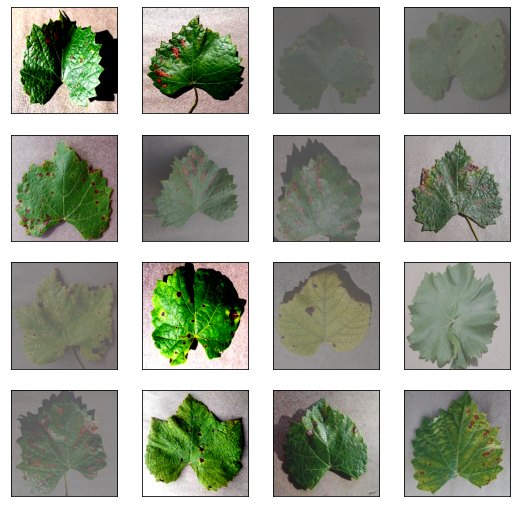

In [ ]:
plt.figure(figsize=(9, 9))
i = 0
for img in sharpness[0:16]:
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
color = [
    np.asarray(
        ImageEnhance.Contrast(Image.fromarray(img, "RGB")).enhance(
            np.random.choice(np.linspace(0.5, 1.5, 5))
        )
    )
    for img in sharpness
]

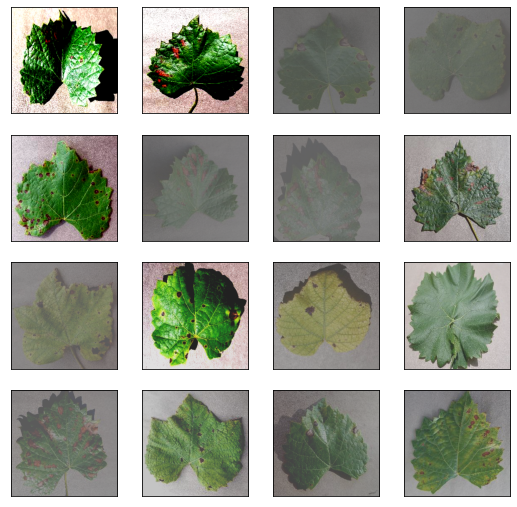

In [ ]:
plt.figure(figsize=(9, 9))
i = 0
for img in color[0:16]:
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
flip = [
    cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img
    for img in color
]

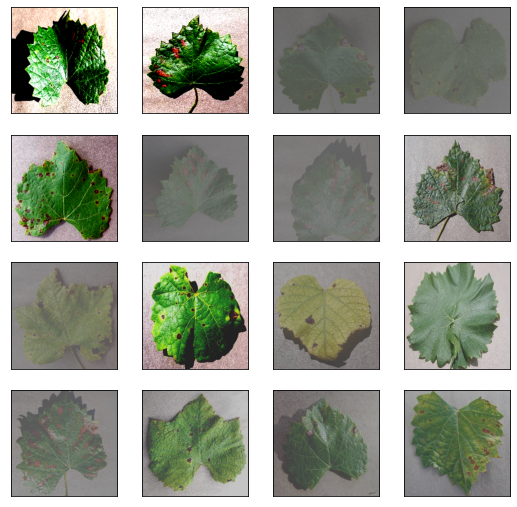

In [ ]:
plt.figure(figsize=(9, 9))
i = 0
for img in flip[0:16]:
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
rotate = [
    Image.fromarray(img, "RGB").rotate(np.random.choice([0, 90, 180, 270]))
    for img in flip
]

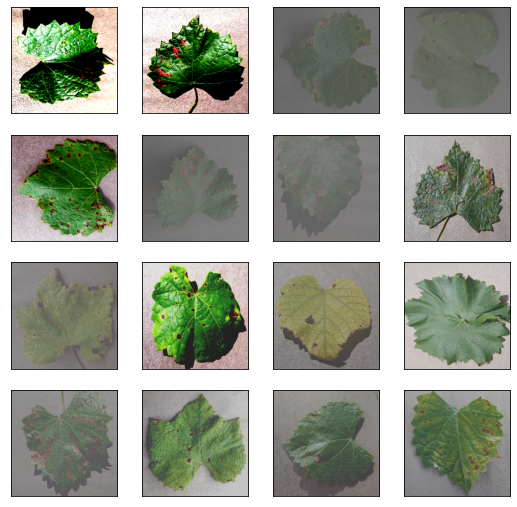

In [ ]:
plt.figure(figsize=(9, 9))
i = 0
for img in rotate[0:16]:
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
import os

for i, image in tqdm(enumerate(rotate)):
    directory = (
        paths[i].rsplit("/", 3)[0] + "/augmented/" + paths[i].rsplit("/", 2)[1] + "/"
    )
    os.makedirs(directory, exist_ok=True)
    image.save(directory + paths[i].rsplit("/", 2)[2])